# Clustering of the Adsorbates

## Data Loading

In [124]:
# import modules and the data set files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('3115_Acyclic_SMILES_Group_Additivity.csv')

In [125]:
df.head()

,SMILES,G01,G02,G03,G04,T01,T02,T03,B01,B02,H01
0,C([Pt])C,1,0,0,0,1,0,0,0,0,0
1,C([Pt])([Pt])C,1,0,0,0,0,0,0,1,0,0
2,C(C[Pt])[Pt],0,0,0,0,2,0,0,0,0,0
3,C([Pt])([Pt])([Pt])C,1,0,0,0,0,0,0,0,0,1
4,C(C[Pt])([Pt])[Pt],0,0,0,0,1,0,0,1,0,0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SMILES  3115 non-null   object
 1   G01     3115 non-null   int64 
 2   G02     3115 non-null   int64 
 3   G03     3115 non-null   int64 
 4   G04     3115 non-null   int64 
 5   T01     3115 non-null   int64 
 6   T02     3115 non-null   int64 
 7   T03     3115 non-null   int64 
 8   B01     3115 non-null   int64 
 9   B02     3115 non-null   int64 
 10  H01     3115 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 267.8+ KB


## 1. Clustering with three components (T_sum, B_sum, H_sum): KM3-3

Nomenclature: KM"n"-"k" (n= # of components used for K-means clustering, k= # of clusters)

The adsorbates extracted from RING are clustered based on the number of each group category (T, B, H) they have. The group category is defined as T, B, and H from the group additivity components with 1, 2, and 3 free valencies, respectively. For clustering, K-means clustering (K=3) with summation of each group category (T,B,H) is used.

## Feature Engineering

In [127]:
# add columns for each subclass (G, T, B, H) and the number of carbons
df_clean = df.copy()
df_clean['G_sum'] = df_clean['G01'] + df_clean['G02'] + df_clean['G03'] + df_clean['G04']
df_clean['T_sum'] = df_clean['T01'] + df_clean['T02'] + df_clean['T03']
df_clean['B_sum'] = df_clean['B01'] + df_clean['B02']
df_clean['H_sum'] = df_clean['H01']
df_clean['C_num'] = (df_clean['G01'] + df_clean['G02'] + df_clean['G03'] + df_clean['G04'] +
                        df_clean['T01'] + df_clean['T02'] + df_clean['T03'] +
                        df_clean['B01'] + df_clean['B02'] + df_clean['H01'])

In [128]:
# add columns for ratio of each subclass
df_clean['G_ratio'] = df_clean['G_sum'] / df_clean['C_num']
df_clean['T_ratio'] = df_clean['T_sum'] / df_clean['C_num']
df_clean['B_ratio'] = df_clean['B_sum'] / df_clean['C_num']
df_clean['H_ratio'] = df_clean['H_sum'] / df_clean['C_num']

In [129]:
# add columns for standard scaled ratio
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['G_ratio', 'T_ratio', 'B_ratio', 'H_ratio']
scaler =StandardScaler()
df_scaled = scaler.fit_transform(df_clean[columns_to_scale])
df_scaled = pd.DataFrame(df_scaled, columns=[col + '_scaled' for col in columns_to_scale])
df_clean = pd.concat([df_clean, df_scaled], axis=1)

## Visualization

d:\anaconda3\envs\ml_model\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


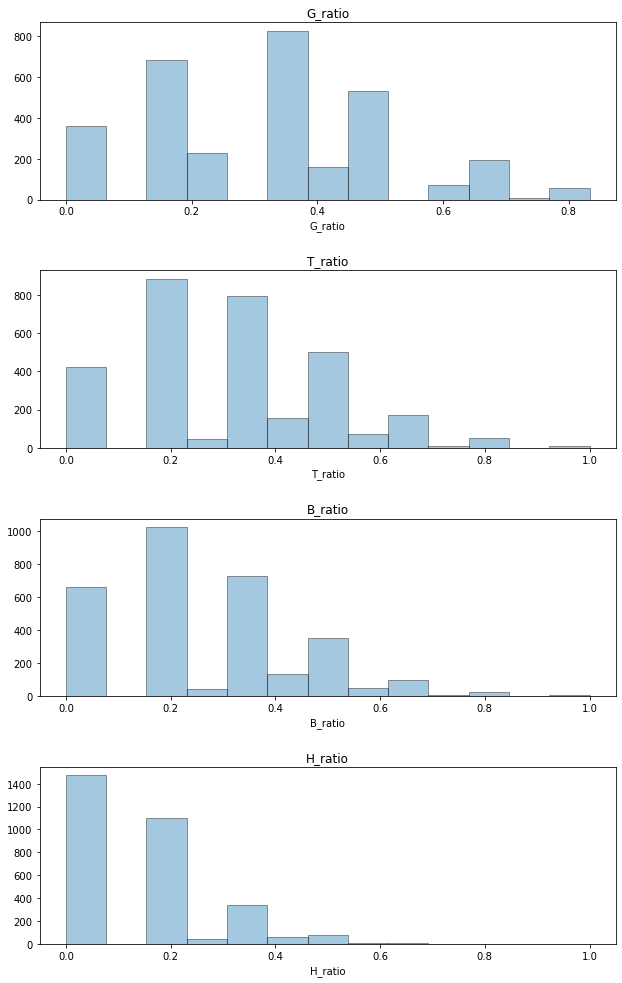

In [130]:
# subclass ratio
base_color = sns.color_palette()[0]
plt.figure(figsize=[10,16])

plt.subplot(4,1,1)
sns.distplot(df_clean['G_ratio'], hist=True, kde=False, bins=13, color=base_color,
             hist_kws={'edgecolor': 'black'})
plt.title('G_ratio')

plt.subplot(4,1,2)
sns.distplot(df_clean['T_ratio'], hist=True, kde=False, bins=13, color=base_color,
             hist_kws={'edgecolor': 'black'})
plt.title('T_ratio')

plt.subplot(4,1,3)
sns.distplot(df_clean['B_ratio'], hist=True, kde=False, bins=13, color=base_color,
             hist_kws={'edgecolor': 'black'})
plt.title('B_ratio')

plt.subplot(4,1,4)
sns.distplot(df_clean['H_ratio'], hist=True, kde=False, bins=13, color=base_color,
             hist_kws={'edgecolor': 'black'})
plt.title('H_ratio')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4);

In [131]:
# df_clean_log = df_clean.copy()
# cols_to_log =['G_ratio','T_ratio','B_ratio','H_ratio']

# for col in cols_to_log:
#     df_clean_log[col] = df_clean_log[col].replace(0, 0.001)
#     df_clean_log['log_'+col] = np.log(df_clean_log[col])

In [132]:
# plt.figure(figsize=[10,16])

# plt.subplot(4,1,1)
# sns.distplot(df_clean_log['log_G_ratio'], hist=True, kde=False, bins=13, color=base_color,
#              hist_kws={'edgecolor': 'black'})
# plt.title('G_ratio')

# plt.subplot(4,1,2)
# sns.distplot(df_clean_log['log_T_ratio'], hist=True, kde=False, bins=13, color=base_color,
#              hist_kws={'edgecolor': 'black'})
# plt.title('T_ratio')

# plt.subplot(4,1,3)
# sns.distplot(df_clean_log['log_B_ratio'], hist=True, kde=False, bins=13, color=base_color,
#              hist_kws={'edgecolor': 'black'})
# plt.title('B_ratio')

# plt.subplot(4,1,4)
# sns.distplot(df_clean_log['log_H_ratio'], hist=True, kde=False, bins=13, color=base_color,
#              hist_kws={'edgecolor': 'black'})
# plt.title('H_ratio')

# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4);

## K-Means Clustering

We aim to cluster the species in a way that each class dominates the other two in a 3D plot of T, B, and H-class space.

In [133]:
from sklearn.cluster import KMeans

# k-means clustering
km = KMeans(n_clusters=3, random_state=192).fit(df_clean[['T_ratio', 'B_ratio', 'H_ratio']].values)
km_scaled = KMeans(n_clusters=3, random_state=192).fit(df_clean[['T_ratio_scaled', 'B_ratio_scaled', 'H_ratio_scaled']].values)

# save the cluster information to the dataframe
df_clean['km'] = km.labels_
df_clean['km_scaled'] = km_scaled.labels_

In [134]:
df_clean.groupby(['km'])[['G_ratio', 'T_ratio', 'B_ratio', 'H_ratio']].mean()

,G_ratio,T_ratio,B_ratio,H_ratio
km,,,,
0,0.289162,0.202816,0.438285,0.069737
1,0.266219,0.526053,0.137695,0.070033
2,0.410157,0.201556,0.133870,0.254417


In [135]:
df_clean.groupby(['km'])[['G_ratio_scaled', 'T_ratio_scaled', 'B_ratio_scaled', 'H_ratio_scaled']].mean()

,G_ratio_scaled,T_ratio_scaled,B_ratio_scaled,H_ratio_scaled
km,,,,
0,-0.147192,-0.519831,0.991552,-0.389599
1,-0.264457,1.097230,-0.593316,-0.387514
2,0.471215,-0.526133,-0.613483,0.910300


In [136]:
df_clean.groupby(['km_scaled'])[['G_ratio', 'T_ratio', 'B_ratio', 'H_ratio']].mean()

,G_ratio,T_ratio,B_ratio,H_ratio
km_scaled,,,,
0,0.304138,0.488751,0.133575,0.073535
1,0.345084,0.190145,0.145412,0.319359
2,0.315435,0.200853,0.421906,0.061806


In [137]:
df_clean.groupby(['km_scaled'])[['G_ratio_scaled', 'T_ratio_scaled', 'B_ratio_scaled', 'H_ratio_scaled']].mean()

,G_ratio_scaled,T_ratio_scaled,B_ratio_scaled,H_ratio_scaled
km_scaled,,,,
0,-0.070651,0.910621,-0.615037,-0.362864
1,0.138625,-0.583217,-0.552627,1.367401
2,-0.012915,-0.529649,0.905194,-0.445421


In [138]:
# change the cluster name to the name of the dominant group
df_clean['km'] = df_clean['km'].replace({0:'B', 1:'T', 2:'H'})
df_clean['km_scaled'] = df_clean['km_scaled'].replace({0:'T', 1:'H', 2:'B'})

In [139]:
df_clean['km'].value_counts(), df_clean['km_scaled'].value_counts()

(B    1178
 T    1005
 H     932
 Name: km, dtype: int64,
 B    1231
 T    1172
 H     712
 Name: km_scaled, dtype: int64)

In [140]:
# make an array for the distance of each point to its cluster centroid
km_dist = km.transform(df_clean[['T_ratio', 'B_ratio', 'H_ratio']].values).min(axis=1)
km_scaled_dist = km_scaled.transform(df_clean[['T_ratio_scaled', 'B_ratio_scaled', 'H_ratio_scaled']].values).min(axis=1)

# save them in the dataframe
df_clean['km_dist'] = km_dist
df_clean['km_scaled_dist'] = km_scaled_dist

In [141]:
(df_clean['km'] == df_clean['km_scaled']).mean()

0.8914927768860353

## Visualization

### 3D Plot


In [142]:
# function for a 3d plot
from matplotlib.colors import ListedColormap

def draw_3dplot_cluster(df, x, y, z, cluster):
    ''' Draw a scatter plot in 3D with clusters hued
    Args:
    df - pandas dataframe
    x,y,z - string. column name for x, y, z-axis
    cluster - string. column name containing cluster information

    Return:
    scatter plot
    '''
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    cmap = ListedColormap(sns.color_palette("husl", 3).as_hex())
    
    x_axis = df[x]
    y_axis = df[y]
    z_axis = df[z]
    
    sc = ax.scatter(x_axis, y_axis, z_axis, s=40, c=df[cluster].replace({'T':0, 'B':1, 'H':2}), cmap=cmap, marker='o', alpha=0.5)
    ax.set_xlabel('T-class')
    ax.set_ylabel('B-class')
    ax.set_zlabel('H-class')

    handles, labels = sc.legend_elements()
    plt.legend(handles, ['T','B','H'], bbox_to_anchor=(1.05,1), loc=2)
    plt.title("Clusters of 3115 acyclic hydrocarbon radicals")
    ax.view_init(30,30)

    plt.show()

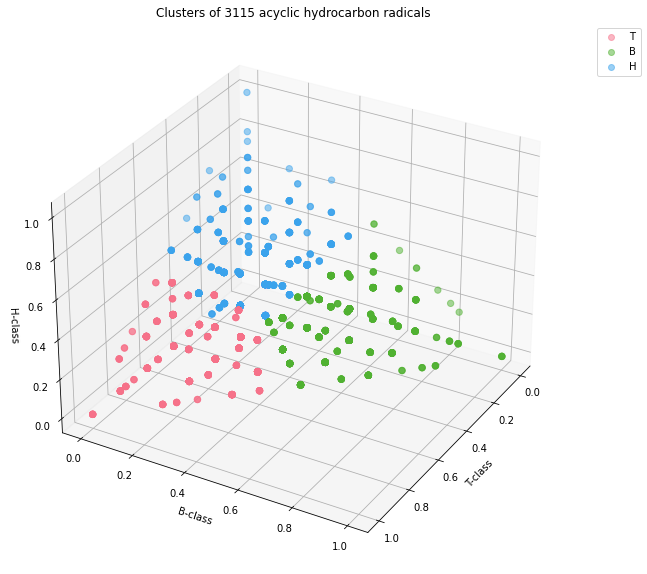

In [143]:
draw_3dplot_cluster(df_clean, 'T_ratio', 'B_ratio', 'H_ratio', 'km')

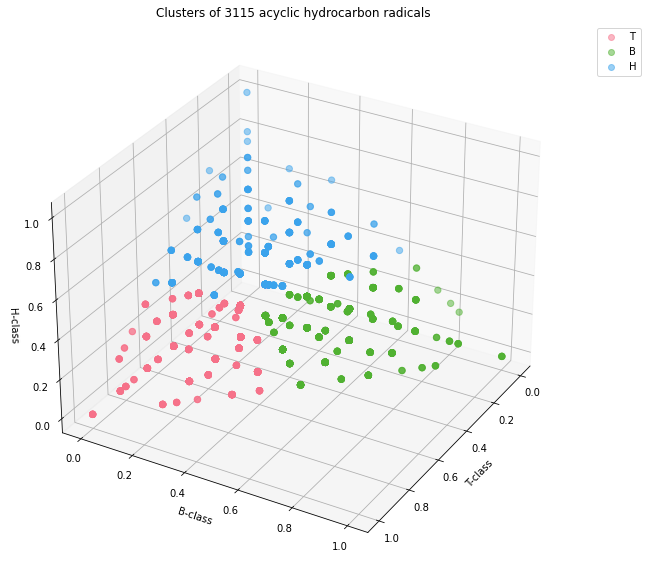

In [144]:
draw_3dplot_cluster(df_clean, 'T_ratio', 'B_ratio', 'H_ratio', 'km_scaled')

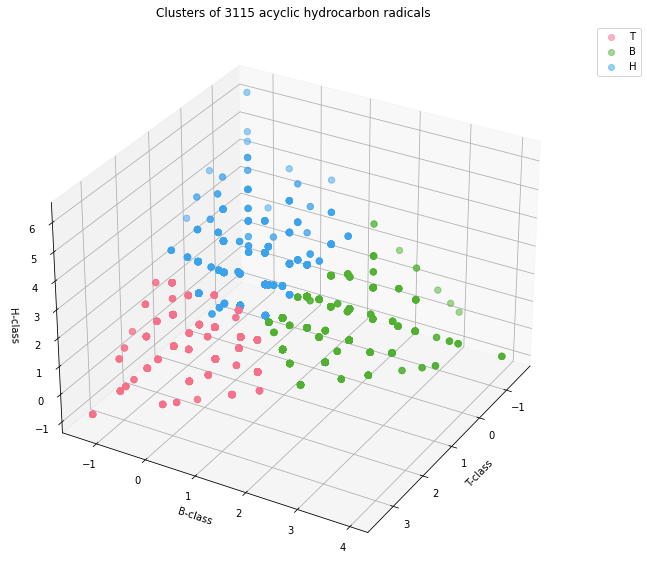

In [145]:
draw_3dplot_cluster(df_clean, 'T_ratio_scaled', 'B_ratio_scaled', 'H_ratio_scaled', 'km')

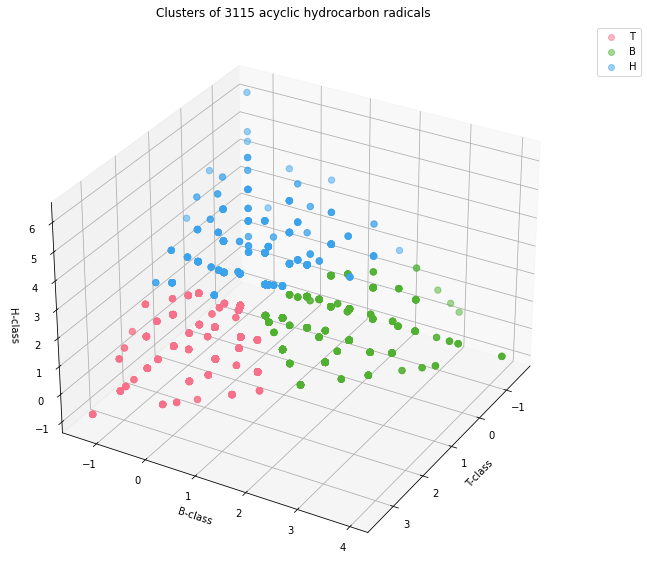

In [146]:
draw_3dplot_cluster(df_clean, 'T_ratio_scaled', 'B_ratio_scaled', 'H_ratio_scaled', 'km_scaled')

### 2D Plot

#### Raw version

In [147]:
# draw 2d plots
def draw_2dplot_cluster(df, x, y, hue, jitter=False):
    if jitter == True:
        sns.lmplot(x=x,y=y,data=df, fit_reg=False, scatter_kws={"s":50, "alpha":0.3}, x_jitter=0.05, y_jitter=0.05, hue=hue)
        plt.show()
    else:
        sns.lmplot(x=x,y=y,data=df, fit_reg=False, scatter_kws={"s":50, "alpha":0.3}, hue=hue)
        plt.show()

In [148]:
# draw 2d plots
def draw_2dplot_cluster_2(df, x, y, hue, style):
    sns.scatterplot(x=x,y=y,data=df, alpha=0.3, hue=hue, style=style)
    plt.show()

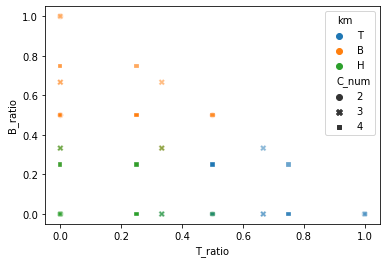

In [149]:
draw_2dplot_cluster_2(df_clean.query('C_num == 2 or C_num == 3 or C_num == 4'), 'T_ratio', 'B_ratio', 'km', 'C_num')

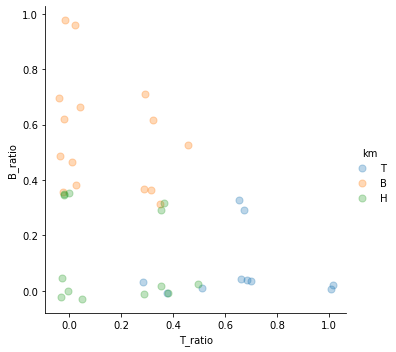

In [150]:
draw_2dplot_cluster(df_clean.query('C_num == 2 or C_num == 3'), 'T_ratio', 'B_ratio', 'km', jitter=True)

In [151]:
df_clean.query('C_num == 2 or C_num == 3 or C_num == 4')['km'].value_counts()

B    61
H    49
T    44
Name: km, dtype: int64

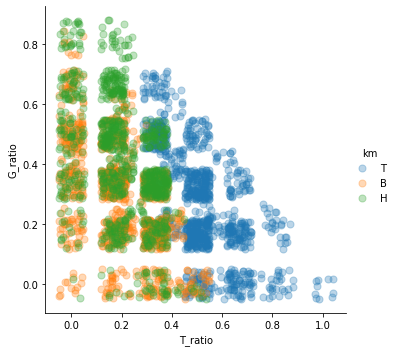

In [152]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'G_ratio', 'km', jitter=True)

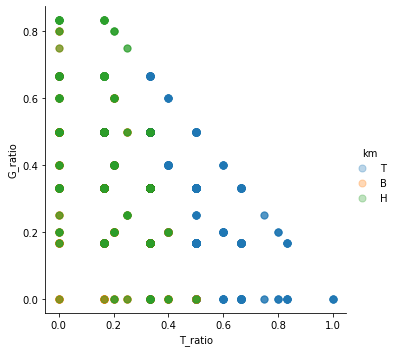

In [153]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'G_ratio', 'km', jitter=False)

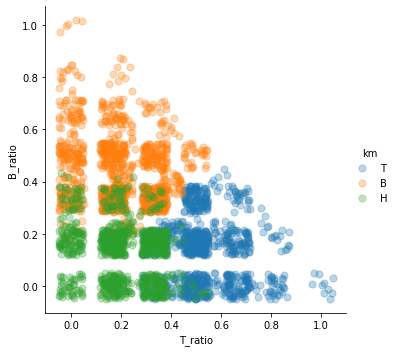

In [154]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'B_ratio', 'km', jitter=True)

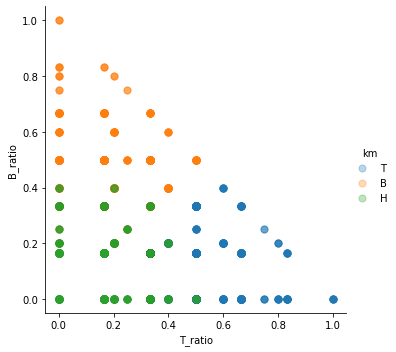

In [155]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'B_ratio', 'km', jitter=False)

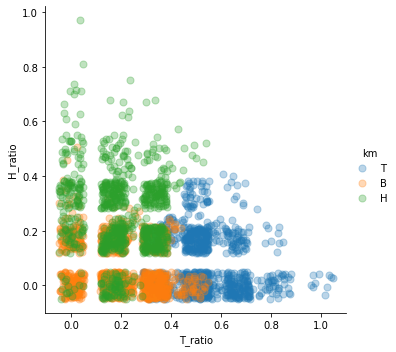

In [156]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'H_ratio', 'km', jitter=True)

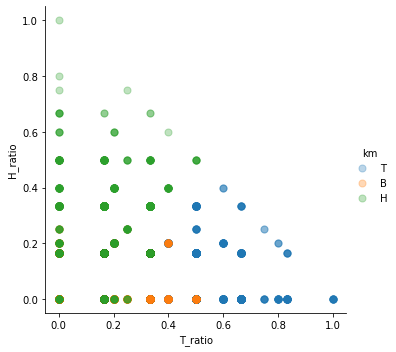

In [157]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'H_ratio', 'km', jitter=False)

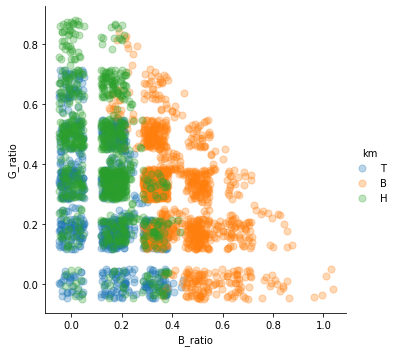

In [158]:
draw_2dplot_cluster(df_clean, 'B_ratio', 'G_ratio', 'km', jitter=True)

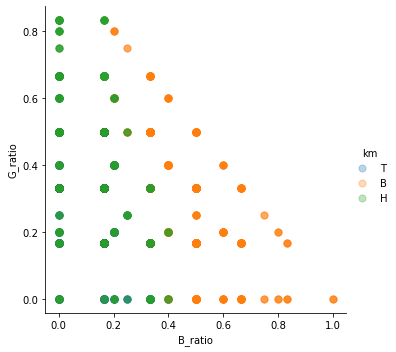

In [159]:
draw_2dplot_cluster(df_clean, 'B_ratio', 'G_ratio', 'km', jitter=False)

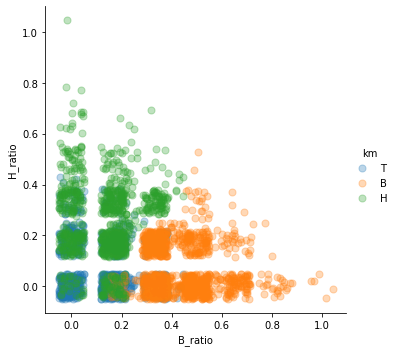

In [160]:
draw_2dplot_cluster(df_clean, 'B_ratio', 'H_ratio', 'km', jitter=True)

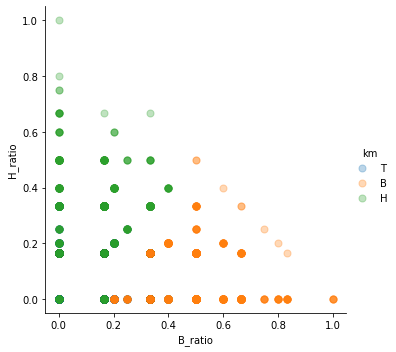

In [161]:
draw_2dplot_cluster(df_clean, 'B_ratio', 'H_ratio', 'km', jitter=False)

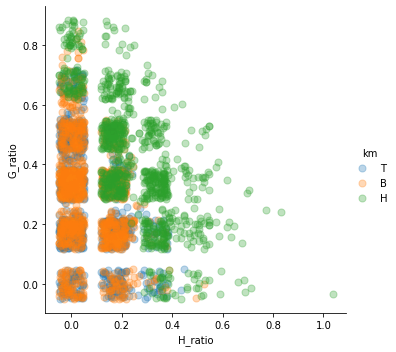

In [162]:
draw_2dplot_cluster(df_clean, 'H_ratio', 'G_ratio', 'km', jitter=True)

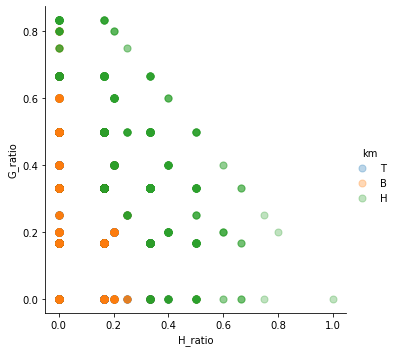

In [163]:
draw_2dplot_cluster(df_clean, 'H_ratio', 'G_ratio', 'km', jitter=False)

#### Scaled version

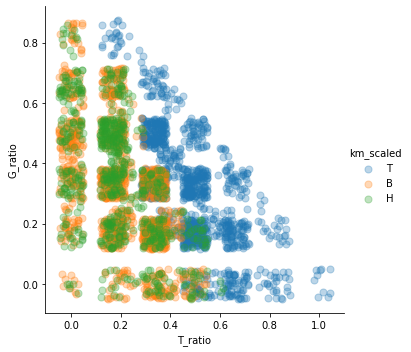

In [164]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'G_ratio', 'km_scaled', jitter=True)

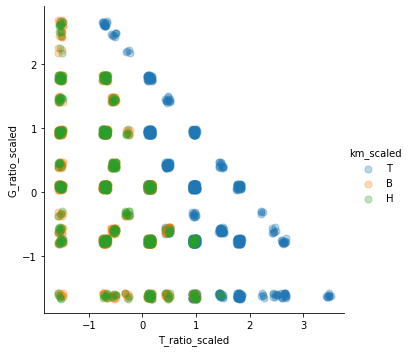

In [165]:
draw_2dplot_cluster(df_clean, 'T_ratio_scaled', 'G_ratio_scaled', 'km_scaled', jitter=True)

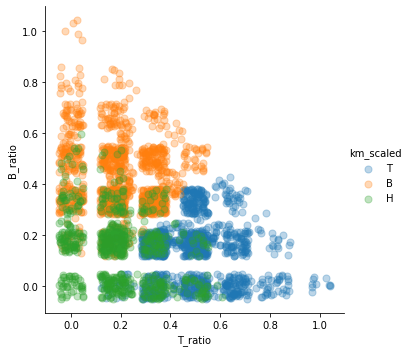

In [166]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'B_ratio', 'km_scaled', jitter=True)

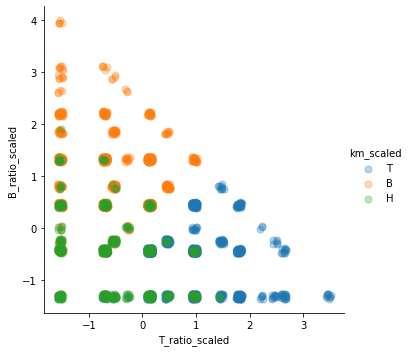

In [167]:
draw_2dplot_cluster(df_clean, 'T_ratio_scaled', 'B_ratio_scaled', 'km_scaled', jitter=True)

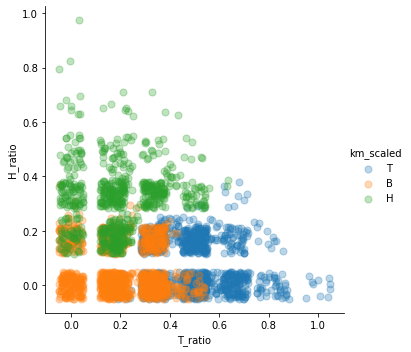

In [168]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'H_ratio', 'km_scaled', jitter=True)

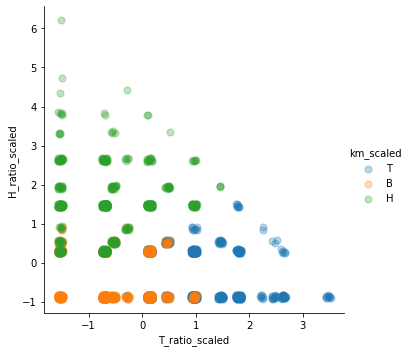

In [169]:
draw_2dplot_cluster(df_clean, 'T_ratio_scaled', 'H_ratio_scaled', 'km_scaled', jitter=True)

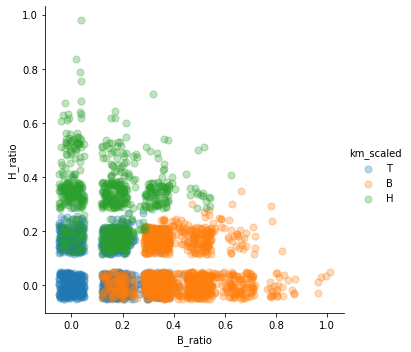

In [170]:
draw_2dplot_cluster(df_clean, 'B_ratio', 'H_ratio', 'km_scaled', jitter=True)

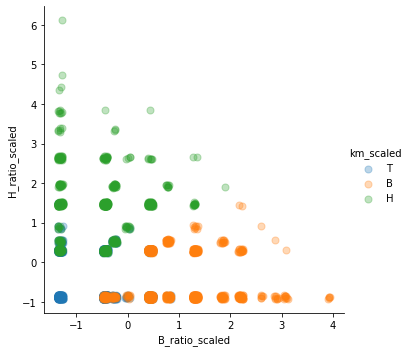

In [171]:
draw_2dplot_cluster(df_clean, 'B_ratio_scaled', 'H_ratio_scaled', 'km_scaled', jitter=True)

In [172]:
# export df_clean to a csv file
# df_clean.to_csv('3115_species_km.csv')

## 2. Clustering with all ten GA components: KM10-3

In [173]:
df_clean.head()

,SMILES,G01,G02,G03,G04,T01,T02,T03,B01,B02,...,B_ratio,H_ratio,G_ratio_scaled,T_ratio_scaled,B_ratio_scaled,H_ratio_scaled,km,km_scaled,km_dist,km_scaled_dist
0,C([Pt])C,1,0,0,0,1,0,0,0,0,...,0.0,0.0,0.930402,0.966894,-1.319314,-0.880453,T,T,0.156663,0.875826
1,C([Pt])([Pt])C,1,0,0,0,0,0,0,1,0,...,0.5,0.0,0.930402,-1.534456,1.316944,-0.880453,B,B,0.223173,1.169799
2,C(C[Pt])[Pt],0,0,0,0,2,0,0,0,0,...,0.0,0.0,-1.625106,3.468245,-1.319314,-0.880453,T,T,0.498488,2.702840
3,C([Pt])([Pt])([Pt])C,1,0,0,0,0,0,0,0,0,...,0.0,0.5,0.930402,-1.534456,-1.319314,2.638872,H,H,0.344756,1.763322
4,C(C[Pt])([Pt])[Pt],0,0,0,0,1,0,0,1,0,...,0.5,0.0,-1.625106,0.966894,1.316944,-0.880453,B,B,0.311433,1.611965


### K-means clustering with pipelines

In [177]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# function for K-means clustering pipeline
def do_kmeans(df, cols_list, k, scale=False):
    # add proportion columns
    prop_cols_list = []
    for col in cols_list:
        df[col+'_prop'] = df[col] / df['C_num']
        prop_cols_list.append(col+'_prop')
        
    if scale == True:
        # define the column transformer
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), prop_cols_list)
            ])

        # define the pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('kmeans', KMeans(n_clusters=k, random_state=192))  # KMeans clustering
        ])

        # fit the pipeline to the dataFrame
        pipeline.fit(df)

        # add the cluster labels to the dataFrame
        df['km'] = pipeline.named_steps['kmeans'].labels_

        # add the distance of each point to its cluster centroid
        km_dist = pipeline.named_steps['kmeans'].transform(df[prop_cols_list].values).min(axis=1)
        df['km_dist'] = km_dist

        return df
    
    if scale == False:
        # perfrom k-means clustering
        km = KMeans(n_clusters=k, random_state=192).fit(df[prop_cols_list].values)

        # add the cluster labels to the dataframe
        df['km'] = km.labels_

        # add the distance of each point to its cluster centroid
        km_dist = km.transform(df[prop_cols_list].values).min(axis=1)
        df['km_dist'] = km_dist

        return df

In [178]:
ga_comp_cols = ['G01','G02','G03','G04','T01','T02','T03','B01','B02','H01']
df_ga = pd.concat([df_clean[['SMILES', 'C_num']],df_clean[ga_comp_cols]], axis=1).copy()

In [179]:
df_ga = do_kmeans(df_ga, ga_comp_cols, 3, scale=False)
df_ga.head()

,SMILES,C_num,G01,G02,G03,G04,T01,T02,T03,B01,...,G03_prop,G04_prop,T01_prop,T02_prop,T03_prop,B01_prop,B02_prop,H01_prop,km,km_dist
0,C([Pt])C,2,1,0,0,0,1,0,0,0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2,0.474956
1,C([Pt])([Pt])C,2,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1,0.533729
2,C(C[Pt])[Pt],2,0,0,0,0,2,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.848456
3,C([Pt])([Pt])([Pt])C,2,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0,0.560211
4,C(C[Pt])([Pt])[Pt],2,0,0,0,0,1,0,0,1,...,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,1,0.533729


In [180]:
# take the columns for merging with df_clean
df_ga_prop_km = df_ga[['SMILES','G01_prop','G02_prop','G03_prop','G04_prop',\
                       'T01_prop','T02_prop','T03_prop','B01_prop','B02_prop',\
                       'H01_prop','km','km_dist']].copy()

In [183]:
df_combined = pd.merge(df_clean, df_ga_prop_km, on='SMILES', suffixes=('_3_3', '_10_3'))
df_combined['km_10_3'] = df_combined['km_10_3'].replace({0:'A',1:'B',2:'C'})

In [184]:
df_combined.groupby(['km_3_3','km_10_3'])['SMILES'].nunique().rename('n_species').reset_index()

,km_3_3,km_10_3,n_species
0,B,A,300
1,B,B,604
2,B,C,274
3,H,A,616
4,H,B,6
5,H,C,310
6,T,A,190
7,T,B,105
8,T,C,710


In [120]:
# export df_clean to a csv file
# df_combined.to_csv('3115_species_km_3_km_10.csv')

### Reorganize the dataframe

In [185]:
df_combined.columns

Index(['SMILES', 'G01', 'G02', 'G03', 'G04', 'T01', 'T02', 'T03', 'B01', 'B02',
       'H01', 'G_sum', 'T_sum', 'B_sum', 'H_sum', 'C_num', 'G_ratio',
       'T_ratio', 'B_ratio', 'H_ratio', 'G_ratio_scaled', 'T_ratio_scaled',
       'B_ratio_scaled', 'H_ratio_scaled', 'km_3_3', 'km_scaled',
       'km_dist_3_3', 'km_scaled_dist', 'G01_prop', 'G02_prop', 'G03_prop',
       'G04_prop', 'T01_prop', 'T02_prop', 'T03_prop', 'B01_prop', 'B02_prop',
       'H01_prop', 'km_10_3', 'km_dist_10_3'],
      dtype='object')

In [186]:
# df_all_km = df_combined.rename(columns={'km_3_comp':'km_3_3','km_dist':'km_3_3_dist','km_10_comp':'km_10_3'})
df_all_km = df_combined.drop(columns=['G_ratio_scaled', 'T_ratio_scaled',\
                                      'B_ratio_scaled', 'H_ratio_scaled',\
                                      'km_scaled','km_scaled_dist']).copy()
df_all_km.columns

Index(['SMILES', 'G01', 'G02', 'G03', 'G04', 'T01', 'T02', 'T03', 'B01', 'B02',
       'H01', 'G_sum', 'T_sum', 'B_sum', 'H_sum', 'C_num', 'G_ratio',
       'T_ratio', 'B_ratio', 'H_ratio', 'km_3_3', 'km_dist_3_3', 'G01_prop',
       'G02_prop', 'G03_prop', 'G04_prop', 'T01_prop', 'T02_prop', 'T03_prop',
       'B01_prop', 'B02_prop', 'H01_prop', 'km_10_3', 'km_dist_10_3'],
      dtype='object')

## 3. Clustering with all ten GA components + different K: KM10-7

Elbow method can be used to determine K

In [187]:
# find the optimum K for K-means clustering
# source code reference: https://nicola-ml.tistory.com/66
from sklearn.cluster import KMeans

def visualize_elbowmethod(data, param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(1, 15):
        km = KMeans(n_clusters=i, n_init=param_n_init, max_iter=param_max_iter, random_state=149)
        km.fit(data)
        distortions.append(km.inertia_)

    plt.plot(range(1, 15), distortions, marker='o')
    plt.xticks(range(1,15,1))
    #plt.ylim(5000, 20000)
    plt.xlabel('Number of Cluster')
    plt.ylabel('WCSS')
    plt.show()

In [188]:
elbow_data = df_ga[['G01_prop','G02_prop','G03_prop','G04_prop','T01_prop','T02_prop','T03_prop',\
                    'B01_prop','B02_prop','H01_prop']].values

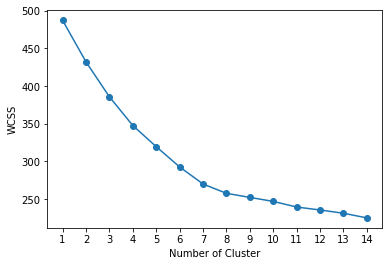

In [189]:
visualize_elbowmethod(elbow_data)

### K-means clustering with k=7

In [208]:
df_ga_10_7 = do_kmeans(df_ga, ga_comp_cols, 7, scale=False)
df_ga_10_7.head()

,SMILES,C_num,G01,G02,G03,G04,T01,T02,T03,B01,...,G03_prop,G04_prop,T01_prop,T02_prop,T03_prop,B01_prop,B02_prop,H01_prop,km,km_dist
0,C([Pt])C,2,1,0,0,0,1,0,0,0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,6,0.501216
1,C([Pt])([Pt])C,2,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0,0.513637
2,C(C[Pt])[Pt],2,0,0,0,0,2,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0.643783
3,C([Pt])([Pt])([Pt])C,2,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,5,0.505870
4,C(C[Pt])([Pt])[Pt],2,0,0,0,0,1,0,0,1,...,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,1,0.487794


#### Clusters on the PC plot

In [209]:
df_pc = pd.read_csv('Total_3115_PC_Label.csv')
df_pc.head()

,SMILES,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,C([Pt])C,0.344473,0.220998,-0.136299,1.017831,0.699492,0.138100,-2.764384e-14,0.076675,1.855171,1.300982e-13,FC
1,C([Pt])([Pt])C,0.344473,0.220998,-0.813318,-0.626954,0.699492,0.138100,-1.647419e-14,0.076675,1.855171,5.450321e-15,FC
2,C(C[Pt])[Pt],0.387952,-0.229041,-0.272597,2.035662,-0.687679,0.074163,-1.324161e-14,-0.073976,1.849460,3.126946e-14,FC
3,C([Pt])([Pt])([Pt])C,0.344473,0.220998,0.949617,-0.390877,0.699492,0.138100,3.402788e-14,0.076675,1.855171,-6.656935e-15,FC
4,C(C[Pt])([Pt])[Pt],0.387952,-0.229041,-0.949617,0.390877,-0.687679,0.074163,-1.759809e-14,-0.073976,1.849460,-5.003993e-14,FC


In [210]:
# merge two dataframes
df_ga_10_7 = pd.merge(df_pc, df_ga_10_7[['SMILES','km','km_dist']], on='SMILES')

# Function to count occurrences of 'C' in a string
def count_c(text):
    return text.count('C')
df_ga_10_7['c_num'] = df_ga_10_7['SMILES'].apply(count_c)

df_ga_10_7.head()

,SMILES,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label,km,km_dist,c_num
0,C([Pt])C,0.344473,0.220998,-0.136299,1.017831,0.699492,0.138100,-2.764384e-14,0.076675,1.855171,1.300982e-13,FC,6,0.501216,2
1,C([Pt])([Pt])C,0.344473,0.220998,-0.813318,-0.626954,0.699492,0.138100,-1.647419e-14,0.076675,1.855171,5.450321e-15,FC,0,0.513637,2
2,C(C[Pt])[Pt],0.387952,-0.229041,-0.272597,2.035662,-0.687679,0.074163,-1.324161e-14,-0.073976,1.849460,3.126946e-14,FC,6,0.643783,2
3,C([Pt])([Pt])([Pt])C,0.344473,0.220998,0.949617,-0.390877,0.699492,0.138100,3.402788e-14,0.076675,1.855171,-6.656935e-15,FC,5,0.505870,2
4,C(C[Pt])([Pt])[Pt],0.387952,-0.229041,-0.949617,0.390877,-0.687679,0.074163,-1.759809e-14,-0.073976,1.849460,-5.003993e-14,FC,1,0.487794,2


In [211]:
df_ga_10_7['km'] = df_ga_10_7['km'].replace({0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G'})

In [212]:
df_ga_10_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3115 entries, 0 to 3114
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SMILES   3115 non-null   object 
 1   PC1      3115 non-null   float64
 2   PC2      3115 non-null   float64
 3   PC3      3115 non-null   float64
 4   PC4      3115 non-null   float64
 5   PC5      3115 non-null   float64
 6   PC6      3115 non-null   float64
 7   PC7      3115 non-null   float64
 8   PC8      3115 non-null   float64
 9   PC9      3115 non-null   float64
 10  PC10     3115 non-null   float64
 11  label    3115 non-null   object 
 12  km       3115 non-null   object 
 13  km_dist  3115 non-null   float64
 14  c_num    3115 non-null   int64  
dtypes: float64(11), int64(1), object(3)
memory usage: 389.4+ KB


In [213]:
# draw PC plot
def draw_pc_plot(df, x, y, hue, jitter=False):
    if jitter == True:
        sns.lmplot(x,y,data=df, fit_reg=False, scatter_kws={"s":50, "alpha":0.3}, x_jitter=0.1, y_jitter=0.1, hue=hue)
        plt.show()
    else:
        sns.lmplot(x,y,data=df, fit_reg=False, scatter_kws={"s":50, "alpha":0.3}, hue=hue)
        plt.show()

d:\anaconda3\envs\ml_model\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


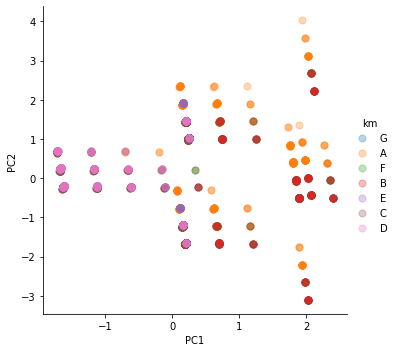

In [214]:
draw_pc_plot(df_ga_10_7, 'PC1', 'PC2', hue='km', jitter=False)

d:\anaconda3\envs\ml_model\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


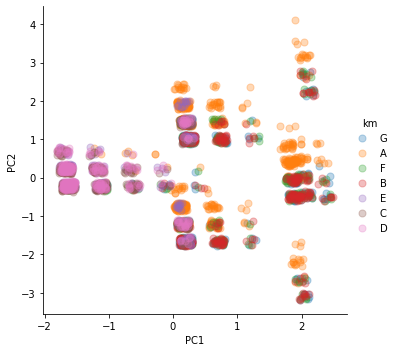

In [215]:
draw_pc_plot(df_ga_10_7, 'PC1', 'PC2', hue='km', jitter=True)

d:\anaconda3\envs\ml_model\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


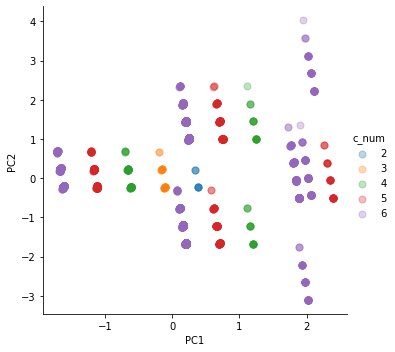

In [216]:
draw_pc_plot(df_ga_10_7, 'PC1', 'PC2', hue='c_num', jitter=False)

d:\anaconda3\envs\ml_model\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


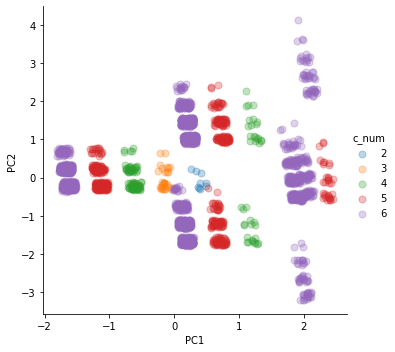

In [217]:
draw_pc_plot(df_ga_10_7, 'PC1', 'PC2', hue='c_num', jitter=True)

In [218]:
# df_ga_10_7.to_csv('3115_species_km_10_7.csv', index=False)

#### Add km10_7 to df_all_km

In [222]:
df_all_km = pd.merge(df_all_km, df_ga_10_7[['SMILES','km','km_dist']], on='SMILES')
df_all_km = df_all_km.rename(columns={'km':'km_10_7', 'km_dist':'km_dist_10_7'})
df_all_km.head()

,SMILES,G01,G02,G03,G04,T01,T02,T03,B01,B02,...,T01_prop,T02_prop,T03_prop,B01_prop,B02_prop,H01_prop,km_10_3,km_dist_10_3,km_10_7,km_dist_10_7
0,C([Pt])C,1,0,0,0,1,0,0,0,0,...,0.5,0.0,0.0,0.0,0.0,0.0,C,0.474956,G,0.501216
1,C([Pt])([Pt])C,1,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.5,0.0,0.0,B,0.533729,A,0.513637
2,C(C[Pt])[Pt],0,0,0,0,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,C,0.848456,G,0.643783
3,C([Pt])([Pt])([Pt])C,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.5,A,0.560211,F,0.505870
4,C(C[Pt])([Pt])[Pt],0,0,0,0,1,0,0,1,0,...,0.5,0.0,0.0,0.5,0.0,0.0,B,0.533729,B,0.487794


In [242]:
def get_min_10(column):
    return column.nsmallest(10)

# avoid cutting when printing
pd.set_option('display.max_colwidth', None)

# 10 species for A-cluster
print("A-cluster")
df_all_km.iloc[df_all_km.query('km_10_3 == "A"')[['km_dist_10_3']].apply(get_min_10).index][['SMILES', 'km_dist_10_3']]

A-cluster


,SMILES,km_dist_10_3
1209,C(CC(C(C([Pt])[Pt])([Pt])[Pt])[Pt])([Pt])([Pt])[Pt],0.211262
1210,C(C(C(CC([Pt])[Pt])([Pt])[Pt])[Pt])([Pt])([Pt])[Pt],0.211262
1269,C(C([Pt])[Pt])(CC(C([Pt])([Pt])[Pt])[Pt])([Pt])[Pt],0.211262
1555,C(CC(C(C([Pt])[Pt])[Pt])([Pt])[Pt])([Pt])([Pt])[Pt],0.211262
1593,C(C(CC(C([Pt])[Pt])[Pt])([Pt])[Pt])([Pt])([Pt])[Pt],0.211262
1726,C(C(C(CC([Pt])[Pt])[Pt])([Pt])[Pt])([Pt])([Pt])[Pt],0.211262
1566,C(CC(C(C([Pt])([Pt])[Pt])[Pt])([Pt])[Pt])([Pt])([Pt])[Pt],0.225157
1632,C(C(CC(C([Pt])([Pt])[Pt])([Pt])[Pt])[Pt])([Pt])([Pt])[Pt],0.225157
1756,C(CC(C(C([Pt])([Pt])[Pt])([Pt])[Pt])[Pt])([Pt])([Pt])[Pt],0.225157
1014,C(C(C(CC[Pt])([Pt])[Pt])[Pt])([Pt])([Pt])[Pt],0.229400


In [243]:
# 10 species for B-cluster
print("B-cluster")
df_all_km.iloc[df_all_km.query('km_10_3 == "B"')[['km_dist_10_3']].apply(get_min_10).index][['SMILES', 'km_dist_10_3']]

B-cluster


,SMILES,km_dist_10_3
816,C(C([Pt])[Pt])(C(CC([Pt])[Pt])[Pt])([Pt])[Pt],0.185523
820,C(C([Pt])[Pt])(CC(C([Pt])[Pt])[Pt])([Pt])[Pt],0.185523
1187,C(C(C([Pt])[Pt])[Pt])(CC([Pt])[Pt])([Pt])[Pt],0.185523
762,C(C([Pt])[Pt])(C(CC([Pt])[Pt])C)([Pt])[Pt],0.229663
788,C(C(C([Pt])[Pt])([Pt])[Pt])(CC([Pt])[Pt])([Pt])C,0.229663
829,C(C([Pt])[Pt])(CC(C([Pt])[Pt])C)([Pt])[Pt],0.229663
1153,C(C(C[Pt])(CC([Pt])[Pt])[Pt])(C([Pt])[Pt])([Pt])[Pt],0.229663
1197,C(C(C([Pt])[Pt])C)(CC([Pt])[Pt])([Pt])[Pt],0.229663
1201,C(C(CC([Pt])[Pt])([Pt])[Pt])(C([Pt])[Pt])([Pt])C,0.229663
1255,C(C([Pt])[Pt])(CC(C([Pt])[Pt])([Pt])[Pt])([Pt])C,0.229663


In [244]:
# 10 species for C-cluster
print("C-cluster")
df_all_km.iloc[df_all_km.query('km_10_3 == "C"')[['km_dist_10_3']].apply(get_min_10).index][['SMILES', 'km_dist_10_3']]

C-cluster


,SMILES,km_dist_10_3
143,C(C[Pt])(CC([Pt])C)([Pt])[Pt],0.197645
226,C(CC(C[Pt])[Pt])([Pt])([Pt])C,0.197645
322,C(C(CC)[Pt])(C[Pt])([Pt])[Pt],0.197645
411,C(C(CC[Pt])[Pt])([Pt])([Pt])C,0.197645
876,C(C(C[Pt])[Pt])(CC)([Pt])[Pt],0.197645
917,C(C([Pt])C)(CC[Pt])([Pt])[Pt],0.197645
794,C(C(C([Pt])[Pt])([Pt])[Pt])(C(C[Pt])[Pt])([Pt])C,0.226173
943,C(C(C([Pt])C)(C[Pt])[Pt])(C([Pt])[Pt])([Pt])[Pt],0.226173
1094,C(C(C(C([Pt])[Pt])[Pt])(C[Pt])[Pt])([Pt])([Pt])C,0.226173
1095,C(C(C(C([Pt])[Pt])[Pt])([Pt])C)(C[Pt])([Pt])[Pt],0.226173


In [245]:
df_all_km.head()

,SMILES,G01,G02,G03,G04,T01,T02,T03,B01,B02,...,T01_prop,T02_prop,T03_prop,B01_prop,B02_prop,H01_prop,km_10_3,km_dist_10_3,km_10_7,km_dist_10_7
0,C([Pt])C,1,0,0,0,1,0,0,0,0,...,0.5,0.0,0.0,0.0,0.0,0.0,C,0.474956,G,0.501216
1,C([Pt])([Pt])C,1,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.5,0.0,0.0,B,0.533729,A,0.513637
2,C(C[Pt])[Pt],0,0,0,0,2,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,C,0.848456,G,0.643783
3,C([Pt])([Pt])([Pt])C,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.5,A,0.560211,F,0.505870
4,C(C[Pt])([Pt])[Pt],0,0,0,0,1,0,0,1,0,...,0.5,0.0,0.0,0.5,0.0,0.0,B,0.533729,B,0.487794


## 4. Clustering with all ten GA components + DFT/ML information